<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Python-For-Finance-Stock-Analysis/blob/master/Predict%20Netflix%20Stock%20Price%20(Tree%20%26%20Lr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['NFLX.csv']))

Saving NFLX.csv to NFLX.csv


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,340.000000,341.000000,332.589996,338.109985,338.109985,14350300
1,2020-01-22,332.549988,336.299988,323.600006,326.000000,326.000000,21730000
2,2020-01-23,326.040009,349.880005,325.010010,349.600006,349.600006,18200300
3,2020-01-24,348.459991,359.850006,345.880005,353.160004,353.160004,17939700
4,2020-01-27,345.950012,351.899994,341.019989,342.880005,342.880005,7709500


In [5]:
df.shape

(252, 7)

In [6]:
df.drop(["High", "Low"], axis=1, inplace = True)

In [7]:
df.head()

,Date,Open,Close,Adj Close,Volume
0,2020-01-21,340.000000,338.109985,338.109985,14350300
1,2020-01-22,332.549988,326.000000,326.000000,21730000
2,2020-01-23,326.040009,349.600006,349.600006,18200300
3,2020-01-24,348.459991,353.160004,353.160004,17939700
4,2020-01-27,345.950012,342.880005,342.880005,7709500


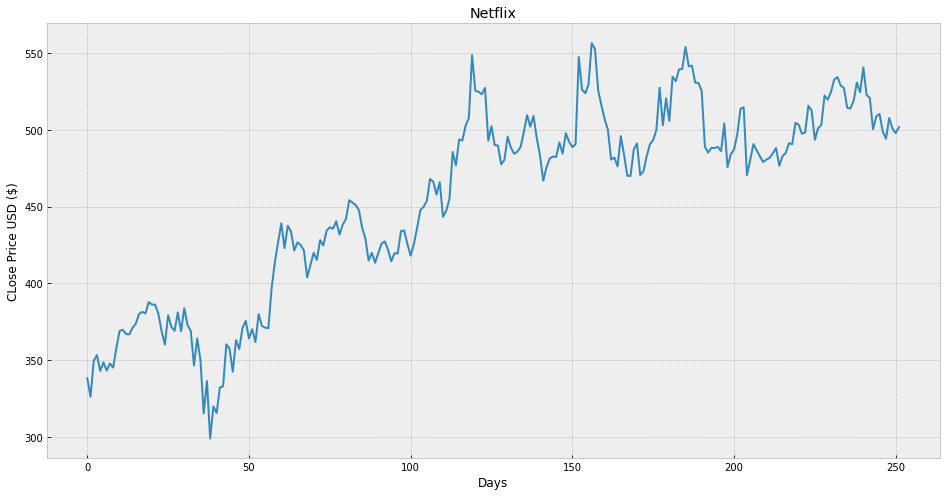

In [8]:
# Visulize the close price data
plt.figure(figsize=(16,8))
plt.title("Netflix")
plt.xlabel("Days")
plt.ylabel("CLose Price USD ($)")
plt.plot(df["Close"])
plt.show()

In [9]:
# Get the close price
df = df[["Close"]]
df.head()

,Close
0,338.109985
1,326.000000
2,349.600006
3,353.160004
4,342.880005


In [13]:
# Create a variable to predict " x " days out into the future
future_days = 25

# Create a new column (target) shifted " x " units/days up
df["prediction"] = df[["Close"]].shift(-future_days)
df.tail()

,Close,prediction
247,494.250000,NaN
248,507.790009,NaN
249,500.859985,NaN
250,497.980011,NaN
251,501.769989,NaN


In [14]:
# Create a future data set (x) and converted it to numpy array and remove the last " x " rows/days
X = np.array(df.drop(["prediction"], 1))[:-future_days]
print(X)

[[338.109985]
 [326.      ]
 [349.600006]
 [353.160004]
 [342.880005]
 [348.519989]
 [343.160004]
 [347.73999 ]
 [345.089996]
 [358.      ]
 [369.01001 ]
 [369.670013]
 [366.950012]
 [366.769989]
 [371.070007]
 [373.690002]
 [380.01001 ]
 [381.399994]
 [380.399994]
 [387.779999]
 [386.190002]
 [386.      ]
 [380.070007]
 [368.700012]
 [360.089996]
 [379.23999 ]
 [371.709991]
 [369.029999]
 [381.049988]
 [368.769989]
 [383.790009]
 [372.779999]
 [368.970001]
 [346.48999 ]
 [364.130005]
 [349.920013]
 [315.25    ]
 [336.299988]
 [298.839996]
 [319.75    ]
 [315.470001]
 [332.029999]
 [332.829987]
 [360.269989]
 [357.320007]
 [342.390015]
 [362.98999 ]
 [357.119995]
 [370.959991]
 [375.5     ]
 [364.079987]
 [370.079987]
 [361.76001 ]
 [379.959991]
 [372.279999]
 [371.119995]
 [370.720001]
 [396.720001]
 [413.549988]
 [426.75    ]
 [439.170013]
 [422.959991]
 [437.48999 ]
 [433.829987]
 [421.420013]
 [426.700012]
 [424.98999 ]
 [421.380005]
 [403.829987]
 [411.890015]
 [419.850006]
 [415.

In [15]:
# Create the target data set (y) and convet it to numpy array and get all of the target values except the last "x" rows/days
y = np.array(df["prediction"])[:-future_days]
print(y)

[379.23999  371.709991 369.029999 381.049988 368.769989 383.790009
 372.779999 368.970001 346.48999  364.130005 349.920013 315.25
 336.299988 298.839996 319.75     315.470001 332.029999 332.829987
 360.269989 357.320007 342.390015 362.98999  357.119995 370.959991
 375.5      364.079987 370.079987 361.76001  379.959991 372.279999
 371.119995 370.720001 396.720001 413.549988 426.75     439.170013
 422.959991 437.48999  433.829987 421.420013 426.700012 424.98999
 421.380005 403.829987 411.890015 419.850006 415.269989 428.149994
 424.679993 434.26001  436.529999 435.549988 440.519989 431.820007
 438.269989 441.950012 454.190002 452.579987 451.040009 447.670013
 436.25     429.320007 414.769989 419.890015 413.440002 419.730011
 425.920013 427.309998 421.970001 414.329987 419.600006 419.48999
 434.049988 434.480011 425.559998 418.070007 425.5      436.130005
 447.769989 449.869995 453.720001 468.040009 466.26001  457.850006
 465.910004 443.399994 447.23999  455.040009 485.640015 476.890015
 

In [16]:
# Split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
# Create the model
# Create the decision treee regrassor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [18]:
# Get the last " x " rows of the future data set
x_future = df.drop(["prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[513.76001 ],
       [514.72998 ],
       [470.5     ],
       [480.23999 ],
       [490.76001 ],
       [486.769989],
       [482.839996],
       [479.100006],
       [480.630005],
       [481.790009],
       [484.670013],
       [488.23999 ],
       [476.619995],
       [482.880005],
       [485.      ],
       [491.359985],
       [490.700012],
       [504.579987],
       [503.380005],
       [497.519989],
       [498.309998],
       [515.780029],
       [512.659973],
       [493.600006],
       [501.089996]])

In [20]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print(" **** \n **** ")

# Show the model linear prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[503.220001 522.419983 519.780029 524.830017 532.900024 493.600006
 528.909973 527.330017 514.47998  513.969971 519.119995 490.700012
 524.590027 508.234985 522.859985 520.799988 500.48999  498.309998
 510.399994 499.100006 507.019989 507.790009 500.859985 497.980011
 501.769989]
 **** 
 **** 
[511.47710674 512.17712188 480.25690219 487.28613034 494.87829632
 491.9987484  489.16252193 486.46341824 487.56759925 488.40475954
 490.48322216 493.05962962 484.67362552 489.19139592 490.72136962
 495.31129072 494.83499652 504.85199972 503.98598782 499.75688805
 500.3270276  512.93492902 510.68322389 496.92788568 502.33331716]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


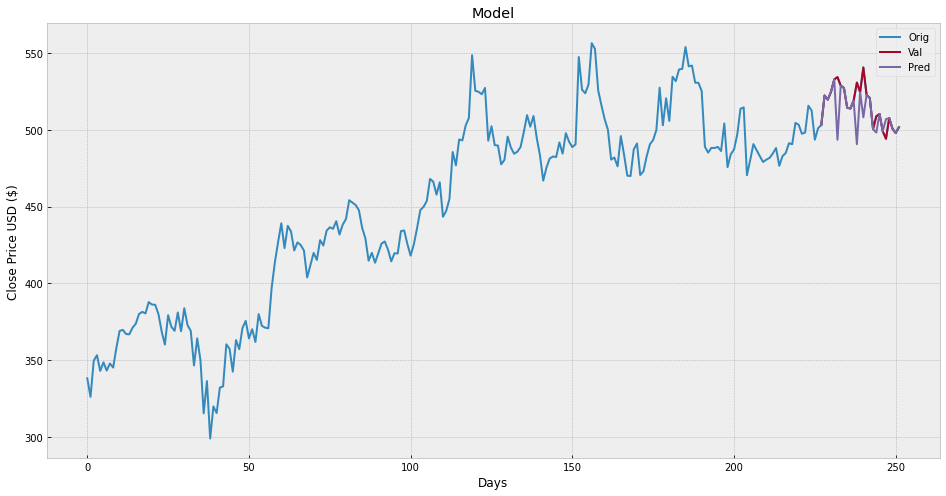

In [23]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid["prediction"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "prediction"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


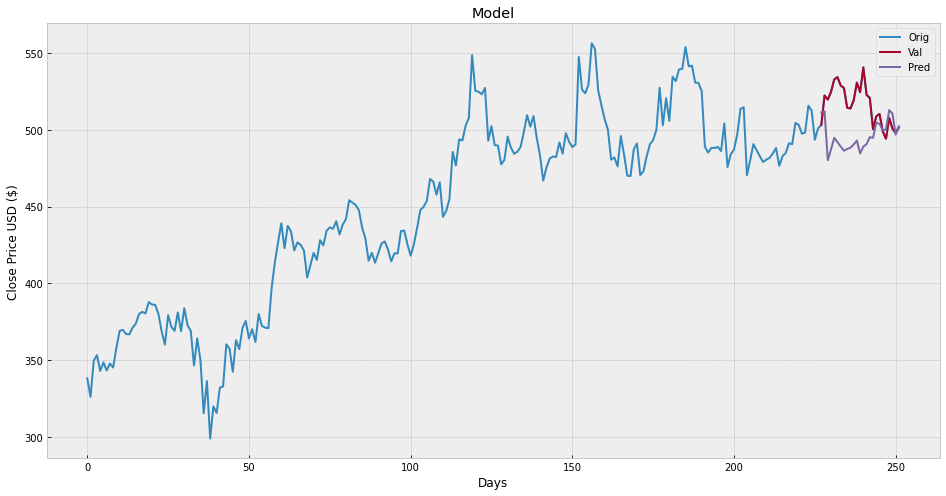

In [24]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid["prediction"] = predictions
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "prediction"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()